<a href="https://colab.research.google.com/github/valeriaskvo/TSA_based_rehabilitation_robot/blob/main/RJ_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def plot_results(x, y, x_label = "T", y_label = "X(T)", plot_title = "X=F(T)", labels = [], xlim = None, ylim = None, show = True):
  plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  plt.grid(True)

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(plot_title)

  if len(x.shape)==1 and len(x.shape)==len(y.shape):
    plt.plot(x, y, color = 'red', linewidth = 3.0)
  else:
    plt.plot(x, y, linewidth = 3.0)


  if labels:
    plt.legend(labels)    

  if show:
    plt.show()
  return

In [2]:
def TSA_inverse_kinematics(TSA, x):
  theta = np.sqrt((TSA["L"]**2-(TSA["L"]-x)**2)/TSA["r"]**2)
  return theta

def TSA_jacobian(TSA, x, theta):
  J = theta*TSA["r"]**2/(TSA["L"]-x)
  dx = J*TSA["dtheta"]
  T = TSA["tau"]/J
  return J, dx, T

In [3]:
TSA = {"L": 300/10**3,     # String length [m]
       "r": 0.8/10**3,     # String radius [m]
       "dtheta": 100,      # Motor nominal speed [rad/sec]
       "tau": 0.18,        # Motor nominal torque [N.m]
       }

TSA["X_max"] = 0.2*TSA["L"]
print(TSA)

{'L': 0.3, 'r': 0.0008, 'dtheta': 100, 'tau': 0.18, 'X_max': 0.06}


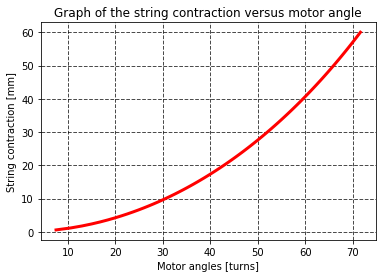

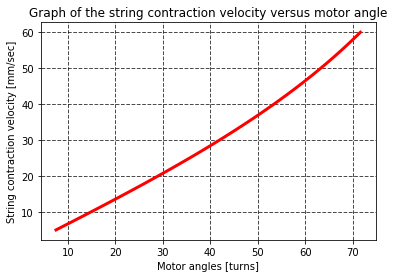

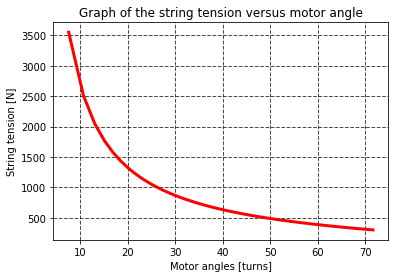

In [4]:
x = np.linspace(0.01*TSA["X_max"], TSA["X_max"], 100)
theta = TSA_inverse_kinematics(TSA, x)
J, dx, T = TSA_jacobian(TSA, x, theta)

motor_angle = theta/np.pi
plot_results(motor_angle, x*10**3, x_label="Motor angles [turns]", y_label="String contraction [mm]", plot_title="Graph of the string contraction versus motor angle")
plot_results(motor_angle, dx*10**3, x_label="Motor angles [turns]", y_label="String contraction velocity [mm/sec]", plot_title="Graph of the string contraction velocity versus motor angle")
plot_results(motor_angle, T, x_label="Motor angles [turns]", y_label="String tension [N]", plot_title="Graph of the string tension versus motor angle")

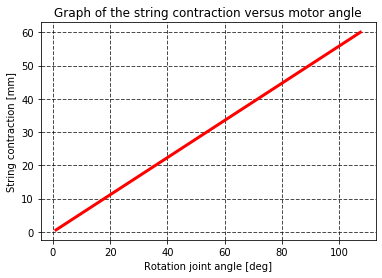

107.42958658702935


In [10]:
RJ = {"R": 32 * 10**(-3)}

alpha = x/RJ["R"]

dalpha = dx/RJ["R"]
tau_RJ = T*RJ["R"]

plot_results(np.rad2deg(alpha), x*10**3, x_label="Rotation joint angle [deg]", y_label="String contraction [mm]", plot_title="Graph of the string contraction versus motor angle")
print(np.max(np.rad2deg(alpha)))